### Measuring Career Preparedness

**How do we measure career preparedness?**

Career preparedness exists as a latent dimension within the response data. We can't expect any one statement to capture the complete scope/nuance of the concept. Preparedness is driven by complex psychological and structural factors. We therefore expect that individuals with high preparedness to share similar response patterns across a range of statements, capturing multiple aspects of readiness for professional advancement. 

The choice on which statements to form a composite measure of preparedness should be determined by balancing theoretically-informed item selection with statistical analysis on observed response correlations and validation techniques for chosen constructs.

We should be mindful of the following:
- use an overall measure of preparedness with caution, noting the complexity of the concept, while balancing the usefulness of an broad-based measure
- separate implicit vs. explicit response variables for separate measures, to enable specificity in later analysis
- consider multiple formulations of preparedness for psychological vs. structural reasons, in addition to an broad based measure
- implement robustness checks to account for these potential limitations

The challenge of effective construct development is not new, nor unique to our analytical situation, so we'll draw on existing methodological studies to inform an effective approach, drawing from established social science literature. 

Methodological Sources:
- [Clark and Watson (2020)](https://pmc.ncbi.nlm.nih.gov/articles/PMC6754793/) - "Constructing Validity: New Development in Creating Objective Measuring Instruments" 
- [Knetka et al. (2019)](https://www.lifescied.org/doi/10.1187/cbe.18-04-0064) - "One Size Doesn't Fit All: Using Factor Analysis to Gather Validity Evidence When Using Surveys in Your Research."
- [Boateng et al. (2018)](https://www.frontiersin.org/journals/public-health/articles/10.3389/fpubh.2018.00149/full) - "Best Practices for Developing and Valdiating Scales for Health, Social, and Behavioral Research: A Primer"


From Boateng et al. (2018):

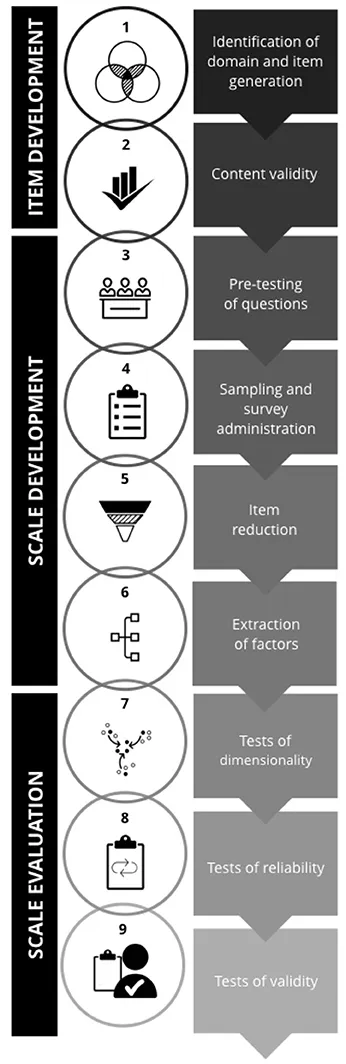

#### Methodology Brainstorming

We're facing a key challenge in measurement validity.
several methodological trade-offs: 
 - 

Methodologies to Explore:
- Theoretically-informed pick (for Item Selection)
- Exploratory Factor Analysis (likely better than PCA)
- Confirmatory Composite Analysis (to explore)
- Cronbach's Alpha (for discriminant testing)

In [4]:
import pandas as pd
df = pd.read_pickle('../data/survey_data_cleaned.pkl')
df.head()


,country,sector,gender,age,pers_extraverted_enthusiastic,pers_critical_quarrelsome,pers_dependable_self-disciplined,pers_anxious_easily_upset,pers_open_to_new_experiences_complex,pers_sympathetic_warm,...,wfs_fcollea,wfs_fenjhyb,wfs_fexcess_wk,wfs_ffin_fair,wfs_flearn_dev,wfs_fmean_full,wfs_fpoorman,wfs_ftoxic,wfs_fuse_skills,wfs_fwellcomp
0,FR,Tech,Female,18-24,5,1,7,3,7,7,...,15.555555,65.555557,25.555555,44.444443,86.666664,63.333332,20.000000,97.777779,91.666664,100.000000
1,FR,Tech,Female,18-24,5,2,6,3,7,7,...,48.888889,37.777779,57.777779,65.555557,76.666664,77.777779,92.222221,67.777779,93.333336,16.666666
2,FR,Tech,Female,18-24,2,3,1,4,2,2,...,86.666664,60.000000,56.666668,48.888889,76.666664,91.666664,30.000000,38.888889,72.222221,83.333336
3,FR,Tech,Female,25-40,4,6,1,3,4,1,...,25.555555,62.222221,40.000000,27.777779,96.666664,21.111111,70.000000,20.000000,93.333336,22.777779
4,FR,Tech,Female,25-40,7,5,7,5,7,7,...,91.111115,0.000000,93.333336,90.000000,84.444443,70.000000,75.555557,98.888885,83.333336,58.888889


##### What correlations appear in the data?

Using 4210 complete cases

=== CORRELATIONS ===
                 el_lgen  el_lres_ski  el_ljou_pro  el_lcont_imp  \
el_lgen             1.00         0.58         0.54          0.55   
el_lres_ski         0.58         1.00         0.53          0.62   
el_ljou_pro         0.54         0.53         1.00          0.50   
el_lcont_imp        0.55         0.62         0.50          1.00   
el_lcont_con        0.52         0.53         0.51          0.53   
el_ljou_opt         0.44         0.47         0.43          0.56   
el_ltra_aut         0.55         0.56         0.47          0.55   
el_ltra_des         0.38         0.28         0.31          0.23   
wfl_luse_skills     0.30         0.35         0.28          0.35   
wfl_llearn_dev      0.25         0.29         0.28          0.30   
wfl_lcarprom_d      0.20         0.20         0.25          0.27   
wfl_lmean_full      0.23         0.27         0.28          0.30   

                 el_lcont_con  el_ljou_opt  el_ltra_aut  el_ltra_de

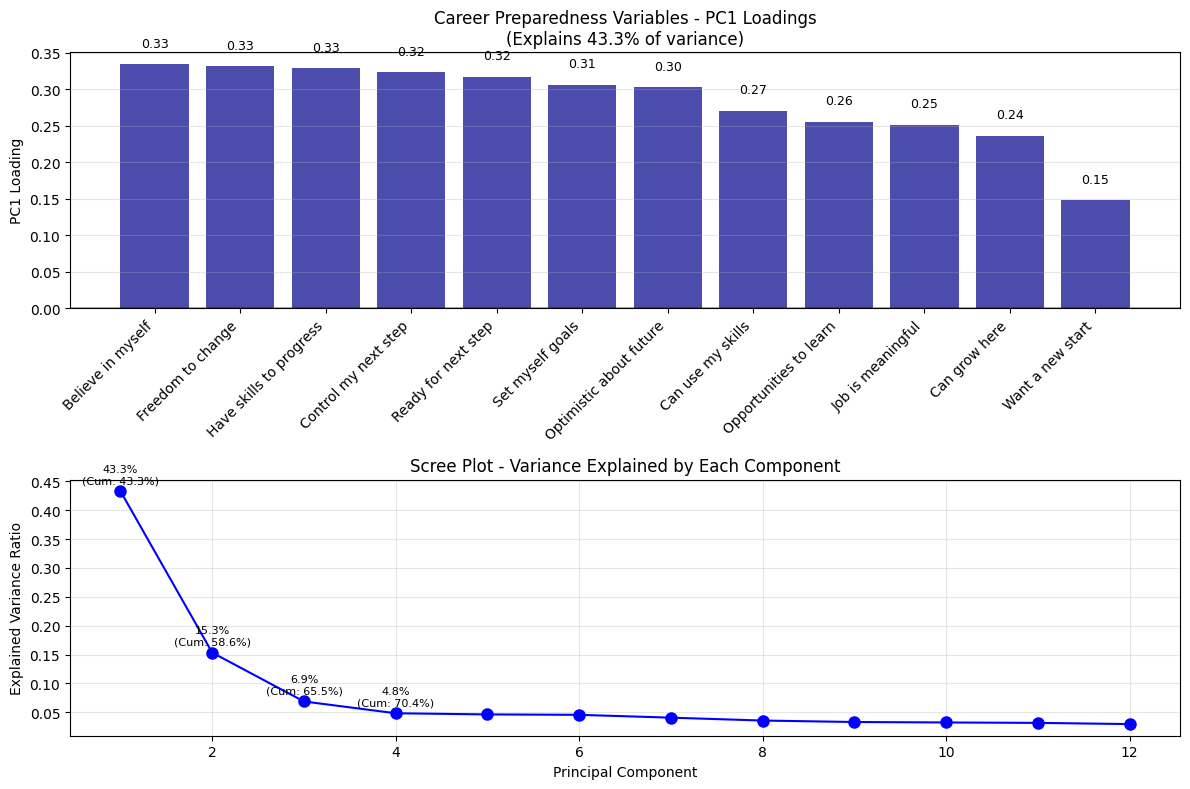


=== INTERPRETATION ===
• PC1 explains 43.3% of variance
• First 3 components explain 65.5% of variance
• Strongest loading: Believe in myself (0.334)
• Weakest loading: Want a new start (0.148)
→ Moderate single factor - composite measure reasonable


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. SELECT VARIABLES - expanded set theoretically relevant to career preparedness
career_vars = [
    'el_lgen',        # I'm ready for my next step
    'el_lres_ski',    # I've got the skills to progress  
    'el_ljou_pro',    # I've set myself goals
    'el_lcont_imp',   # I believe in myself
    'el_lcont_con',   # I control my next step
    'el_ljou_opt',    # I'm optimistic about the future
    'el_ltra_aut',    # I've got freedom to change
    'el_ltra_des',    # I want a new start
    'wfl_luse_skills', # I can use my skills
    'wfl_llearn_dev',  # I have opportunities to learn
    'wfl_lcarprom_d',  # I can grow here
    'wfl_lmean_full'   # I find my job meaningful
]

# Variable name mapping for cleaner visualization
var_names = {
    'el_lgen': 'Ready for next step',
    'el_lres_ski': 'Have skills to progress',
    'el_ljou_pro': 'Set myself goals',
    'el_lcont_imp': 'Believe in myself', 
    'el_lcont_con': 'Control my next step',
    'el_ljou_opt': 'Optimistic about future',
    'el_ltra_aut': 'Freedom to change',
    'el_ltra_des': 'Want a new start',
    'wfl_luse_skills': 'Can use my skills',
    'wfl_llearn_dev': 'Opportunities to learn',
    'wfl_lcarprom_d': 'Can grow here',
    'wfl_lmean_full': 'Job is meaningful'
}

# Get complete cases
career_data = data[career_vars].dropna()
print(f"Using {len(career_data)} complete cases")

# 2. CORRELATION ANALYSIS
print("\n=== CORRELATIONS ===")
corr = career_data.corr()
print(corr.round(2))

# 3. PCA ANALYSIS  
# Standardize data
scaler = StandardScaler()
career_scaled = scaler.fit_transform(career_data)

# Run PCA
pca = PCA()
pca.fit(career_scaled)

# How much variance does first component explain?
print(f"\nFirst component explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"First 2 components explain {sum(pca.explained_variance_ratio_[:2]):.1%} of variance")

# What variables load highest on first component?
loadings = pd.DataFrame({
    'Variable': career_vars,
    'Variable_Name': [var_names[var] for var in career_vars],
    'PC1_Loading': pca.components_[0]
}).sort_values('PC1_Loading', key=abs, ascending=False)

print("\n=== PC1 LOADINGS (highest to lowest) ===")
print(loadings[['Variable_Name', 'PC1_Loading']].round(3))

# Enhanced visualization
plt.figure(figsize=(12, 8))

# Main loadings plot
plt.subplot(2, 1, 1)
colors = ['darkblue' if x > 0 else 'darkred' for x in loadings['PC1_Loading']]
bars = plt.bar(range(len(loadings)), loadings['PC1_Loading'], color=colors, alpha=0.7)
plt.xticks(range(len(loadings)), loadings['Variable_Name'], rotation=45, ha='right')
plt.ylabel('PC1 Loading')
plt.title(f'Career Preparedness Variables - PC1 Loadings\n(Explains {pca.explained_variance_ratio_[0]:.1%} of variance)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, loadings['PC1_Loading'])):
    plt.text(bar.get_x() + bar.get_width()/2, value + (0.02 if value > 0 else -0.02), 
             f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top', fontsize=9)

# Scree plot
plt.subplot(2, 1, 2)
components = range(1, len(pca.explained_variance_ratio_) + 1)
plt.plot(components, pca.explained_variance_ratio_, 'bo-', markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Variance Explained by Each Component')
plt.grid(True, alpha=0.3)

# Add cumulative variance labels
cumvar = np.cumsum(pca.explained_variance_ratio_)
for i in range(min(4, len(components))):  # Show first 4 components
    plt.text(i+1, pca.explained_variance_ratio_[i] + 0.01, 
             f'{pca.explained_variance_ratio_[i]:.1%}\n(Cum: {cumvar[i]:.1%})', 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Summary interpretation
print(f"\n=== INTERPRETATION ===")
print(f"• PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"• First 3 components explain {sum(pca.explained_variance_ratio_[:3]):.1%} of variance")
print(f"• Strongest loading: {loadings.iloc[0]['Variable_Name']} ({loadings.iloc[0]['PC1_Loading']:.3f})")
print(f"• Weakest loading: {loadings.iloc[-1]['Variable_Name']} ({loadings.iloc[-1]['PC1_Loading']:.3f})")

if pca.explained_variance_ratio_[0] > 0.5:
    print("→ Strong single factor - good candidate for composite measure")
elif pca.explained_variance_ratio_[0] > 0.4:
    print("→ Moderate single factor - composite measure reasonable")
else:
    print("→ Weak single factor - consider multiple dimensions")

How can we be certain that this PC is actually measuring career preparedness? 

##### How do implicit scores relate to explicit scores?

Key to determining whether to combine or segregate these in a composite preparedness measure.

Complete cases: 4203

=== IMPLICIT vs EXPLICIT CORRELATIONS ===
ready_next_step: r = 0.343 (p = 0.000)
have_skills: r = 0.374 (p = 0.000)
set_goals: r = 0.394 (p = 0.000)
believe_myself: r = 0.462 (p = 0.000)
control_step: r = 0.353 (p = 0.000)
anxious_change: r = 0.299 (p = 0.000)
happy_where_am: r = 0.490 (p = 0.000)
use_skills: r = 0.330 (p = 0.000)
learn_opportunities: r = 0.358 (p = 0.000)

Mean implicit-explicit correlation: 0.378

Composite measures correlation: r = 0.608 (p = 0.000)

=== SYSTEMATIC DIFFERENCES ===
Mean difference (implicit - explicit): -20.610
Std difference: 31.812
High discrepancy cases: 1857 (44.2%)


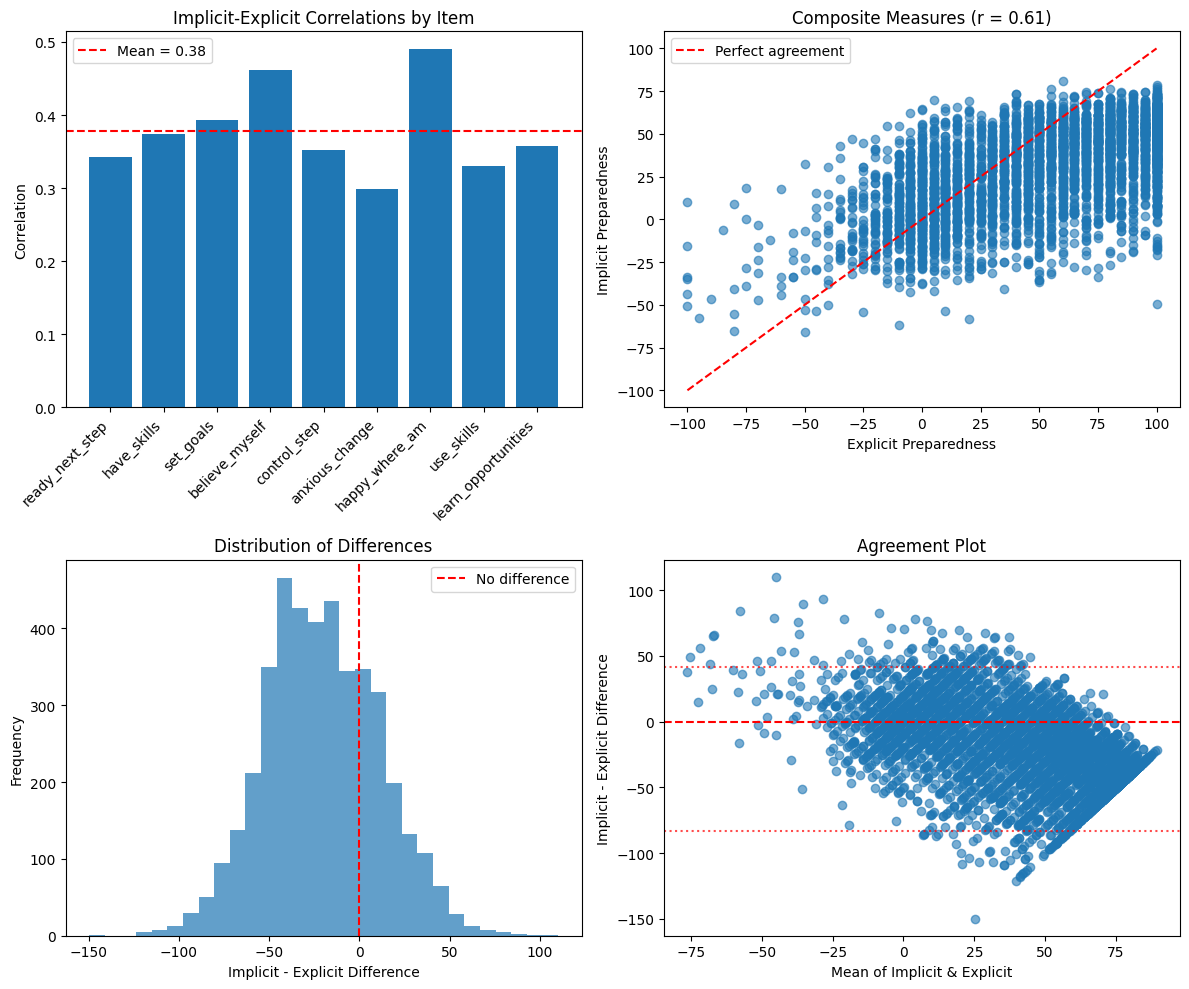


DECISION FRAMEWORK
MODERATE AGREEMENT: Related but distinct
→ Keep both measures - they provide complementary information
→ Look at discrepancies for interesting insights

If mean difference ≠ 0: Systematic bias toward explicit
Large individual differences suggest measuring different aspects of preparedness


In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_pickle("../data/survey_data_cleaned.pkl")

# Define matching implicit/explicit pairs
implicit_explicit_pairs = {
    'ready_next_step': ('es_fgen', 'el_lgen'),
    'have_skills': ('es_fres_ski', 'el_lres_ski'), 
    'set_goals': ('es_fjou_pro', 'el_ljou_pro'),
    'believe_myself': ('es_fcont_imp', 'el_lcont_imp'),
    'control_step': ('es_fcont_con', 'el_lcont_con'),
    'anxious_change': ('es_fbal_anx', 'el_lbal_anx'),
    'happy_where_am': ('es_fbal_sat', 'el_lbal_sat'),
    'use_skills': ('wfs_fuse_skills', 'wfl_luse_skills'),
    'learn_opportunities': ('wfs_flearn_dev', 'wfl_llearn_dev')
}

# Get complete data for analysis
all_vars = [var for pair in implicit_explicit_pairs.values() for var in pair]
complete_data = data[all_vars].dropna()
print(f"Complete cases: {len(complete_data)}")

# Approach 1: Compare implicit vs explicit correlations
print("\n=== IMPLICIT vs EXPLICIT CORRELATIONS ===")
correlations = []
for concept, (implicit, explicit) in implicit_explicit_pairs.items():
    if implicit in complete_data.columns and explicit in complete_data.columns:
        corr, p_val = pearsonr(complete_data[implicit], complete_data[explicit])
        correlations.append({
            'concept': concept,
            'correlation': corr,
            'p_value': p_val,
            'implicit': implicit,
            'explicit': explicit
        })
        print(f"{concept}: r = {corr:.3f} (p = {p_val:.3f})")

corr_df = pd.DataFrame(correlations)
mean_corr = corr_df['correlation'].mean()
print(f"\nMean implicit-explicit correlation: {mean_corr:.3f}")

# Approach 2: Create separate composite measures
prep_implicit = ['es_fgen', 'es_fres_ski', 'es_fjou_pro', 'es_fcont_imp', 'es_fcont_con']
prep_explicit = ['el_lgen', 'el_lres_ski', 'el_ljou_pro', 'el_lcont_imp', 'el_lcont_con']

# Remove any variables not in data
prep_implicit = [v for v in prep_implicit if v in complete_data.columns]
prep_explicit = [v for v in prep_explicit if v in complete_data.columns]

complete_data['prep_implicit'] = complete_data[prep_implicit].mean(axis=1)
complete_data['prep_explicit'] = complete_data[prep_explicit].mean(axis=1)

# How correlated are the composite measures?
composite_corr, composite_p = pearsonr(complete_data['prep_implicit'], 
                                     complete_data['prep_explicit'])
print(f"\nComposite measures correlation: r = {composite_corr:.3f} (p = {composite_p:.3f})")

# Approach 3: Look for systematic differences
print("\n=== SYSTEMATIC DIFFERENCES ===")
complete_data['implicit_explicit_diff'] = (complete_data['prep_implicit'] - 
                                          complete_data['prep_explicit'])

print(f"Mean difference (implicit - explicit): {complete_data['implicit_explicit_diff'].mean():.3f}")
print(f"Std difference: {complete_data['implicit_explicit_diff'].std():.3f}")

# Who shows biggest discrepancies?
high_discrepancy = complete_data['implicit_explicit_diff'].abs() > complete_data['implicit_explicit_diff'].std()
print(f"High discrepancy cases: {high_discrepancy.sum()} ({high_discrepancy.mean():.1%})")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Individual correlations
axes[0,0].bar(range(len(corr_df)), corr_df['correlation'])
axes[0,0].set_xticks(range(len(corr_df)))
axes[0,0].set_xticklabels(corr_df['concept'], rotation=45, ha='right')
axes[0,0].set_ylabel('Correlation')
axes[0,0].set_title('Implicit-Explicit Correlations by Item')
axes[0,0].axhline(mean_corr, color='red', linestyle='--', label=f'Mean = {mean_corr:.2f}')
axes[0,0].legend()

# Plot 2: Composite scatter
axes[0,1].scatter(complete_data['prep_explicit'], complete_data['prep_implicit'], alpha=0.6)
axes[0,1].plot([complete_data['prep_explicit'].min(), complete_data['prep_explicit'].max()],
               [complete_data['prep_explicit'].min(), complete_data['prep_explicit'].max()], 
               'r--', label='Perfect agreement')
axes[0,1].set_xlabel('Explicit Preparedness')
axes[0,1].set_ylabel('Implicit Preparedness')
axes[0,1].set_title(f'Composite Measures (r = {composite_corr:.2f})')
axes[0,1].legend()

# Plot 3: Difference distribution
axes[1,0].hist(complete_data['implicit_explicit_diff'], bins=30, alpha=0.7)
axes[1,0].axvline(0, color='red', linestyle='--', label='No difference')
axes[1,0].set_xlabel('Implicit - Explicit Difference')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Differences')
axes[1,0].legend()

# Plot 4: Bland-Altman style plot
mean_scores = (complete_data['prep_implicit'] + complete_data['prep_explicit']) / 2
diff_scores = complete_data['implicit_explicit_diff']
axes[1,1].scatter(mean_scores, diff_scores, alpha=0.6)
axes[1,1].axhline(0, color='red', linestyle='--')
axes[1,1].axhline(diff_scores.mean() + 1.96*diff_scores.std(), color='red', linestyle=':', alpha=0.7)
axes[1,1].axhline(diff_scores.mean() - 1.96*diff_scores.std(), color='red', linestyle=':', alpha=0.7)
axes[1,1].set_xlabel('Mean of Implicit & Explicit')
axes[1,1].set_ylabel('Implicit - Explicit Difference')
axes[1,1].set_title('Agreement Plot')

plt.tight_layout()
plt.show()

# Decision framework
print("\n" + "="*50)
print("DECISION FRAMEWORK")
print("="*50)

if composite_corr > 0.8:
    print("HIGH AGREEMENT: Implicit and explicit measure similar construct")
    print("→ Could use either measure or average them")
elif composite_corr > 0.5:
    print("MODERATE AGREEMENT: Related but distinct")
    print("→ Keep both measures - they provide complementary information")
    print("→ Look at discrepancies for interesting insights")
else:
    print("LOW AGREEMENT: Very different constructs")
    print("→ Definitely keep separate")
    print("→ Implicit may capture unconscious attitudes")
    print("→ Explicit may capture conscious self-perception")

# Additional insights
print(f"\nIf mean difference ≠ 0: Systematic bias toward {'implicit' if complete_data['implicit_explicit_diff'].mean() > 0 else 'explicit'}")
print(f"Large individual differences suggest measuring different aspects of preparedness")

#### How do alternative measures of preparedness deviate from the composite?

Specifically, how do psychological vs. structural preparedness measures differ? Are they correlated?

#### What about 'Career Unpreparedness'?